#Building MNIST Neural Network using Numpy

##Importing dataset

In [0]:
import numpy as np
np.random.seed(42)    
import matplotlib.pyplot as plt
from IPython.display import clear_output
import keras
from keras.preprocessing.image import ImageDataGenerator

def load_dataset():
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

## 15000 records to be considered for training.

    X_train= X_train[:-15000]
    y_train = y_train[:-15000]

    X_train = X_train.reshape([X_train.shape[0], -1])
        
   ## All testing records to be considered
   
    X_test = X_test.reshape([X_test.shape[0], -1])

    return X_train, y_train, X_test, y_test
  

X_train, y_train, X_test, y_test = load_dataset()





##Previewing the Train and Test data shapes

In [17]:
print(X_train.shape,y_train.shape, X_test.shape,y_test.shape)

(45000, 784) (45000,) (10000, 784) (10000,)


##Preview the data

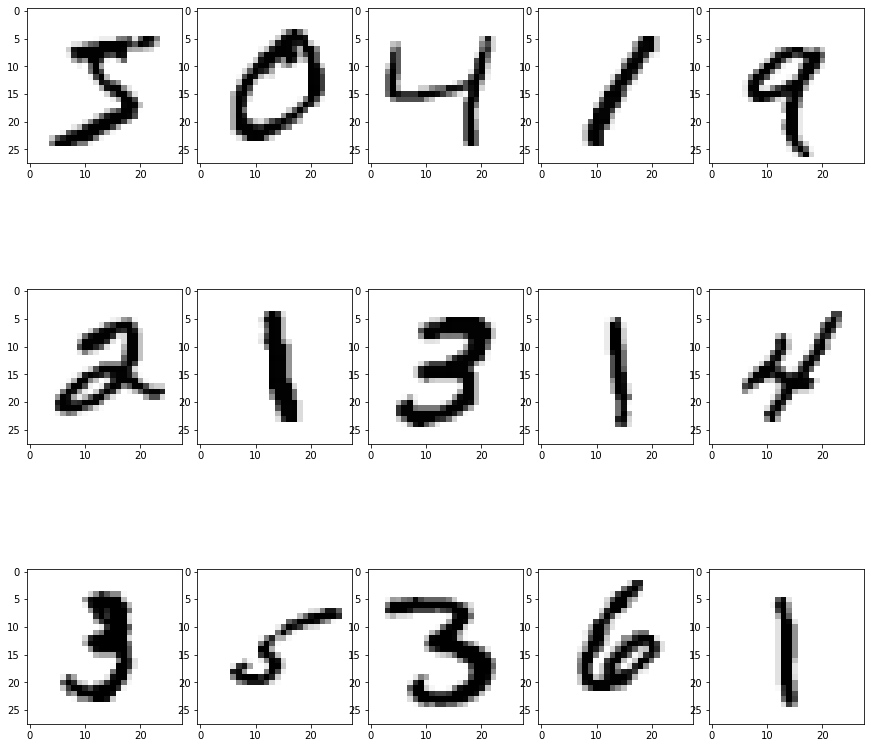

In [18]:
plt.figure(figsize=(15,15))
for i in range(15):  
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

##Normalize the data

In [0]:
    X_train = X_train.astype(float) / 255.
    X_test = X_test.astype(float) / 255.

##Defining Neural network layers and weight initialization

In [0]:
class NodeLayer():
    def __init__(self, X, Y, alpha=0.1):
        self.alpha = alpha
        self.biases = np.zeros(Y) 
        #weight intialization
        self.weights = np.random.randn(X, Y)*0.01
    
    def fwd_propagation(self,X):
        return np.matmul(X, self.weights) + self.biases
      
    def back_propagation(self,X,grad):
        gradient_inputs = np.dot(grad,np.transpose(self.weights))

        bias_deltas = np.sum(grad, axis = 0)
        weight_deltas = np.transpose(np.dot(np.transpose(grad),X))
        
        
        self.weights = self.weights - self.alpha * weight_deltas
        self.biases = self.biases - self.alpha * bias_deltas
        return gradient_inputs

##Activation Layer after each Node Layer

In [0]:
class ActivationLayer():
    def __init__(self):
       
        pass
    
    def fwd_propagation(self, input):
       
        return np.maximum(0,input)

    def back_propagation(self, input, grad):
       
        relu_grad = input > 0
        return grad*relu_grad

##Defining Final output(Softmax) and Error Function

In [0]:
def softmax(layer_outputs,targets):
    
    fn_outputs = layer_outputs[np.arange(len(layer_outputs)),targets]
    
    cross_entropy = - fn_outputs + np.log(np.sum(np.exp(layer_outputs),axis=-1))
    
    return cross_entropy

def gradient_softmax(layer_outputs,targets):
   
    outputs = np.zeros_like(layer_outputs)
    outputs[np.arange(len(layer_outputs)),targets] = 1
    
    softmax = np.exp(layer_outputs) / np.exp(layer_outputs).sum(axis=-1,keepdims=True)
    
    return (- outputs + softmax) / layer_outputs.shape[0]

##Training and Prediction functions

In [0]:
def predictions(neural_network,X):

    layer_output = []
    for i in range(len(neural_network)):
        layer_output.append(neural_network[i].fwd_propagation(X))
        X = neural_network[i].fwd_propagation(X)
    
    layer_outputs = layer_output[-1]
    return layer_outputs.argmax(axis=-1)

def learn_neural_network(neural_network,X,y):
    
    layer_output = []
    for i in range(len(neural_network)):
        layer_output.append(neural_network[i].fwd_propagation(X))
        X = neural_network[i].fwd_propagation(X)
    
    layer_outputs = layer_output[-1]
    
    
    error = softmax(layer_outputs,y)
    error_gradient = gradient_softmax(layer_outputs,y)
    
    for i in range(1, len(neural_network)):
        error_gradient = neural_network[len(neural_network) - i].back_propagation(layer_output[len(neural_network) - i - 1], error_gradient)
    
    return np.mean(error)
  


##Setting up layers of neural networks and their sizes

In [0]:
neural_network = []
neural_network.append(NodeLayer(X_train.shape[1],512))
neural_network.append(ActivationLayer())
neural_network.append(NodeLayer(512,256))
neural_network.append(ActivationLayer())
neural_network.append(NodeLayer(256,10))

##Initialize and train the network

In [0]:
from tqdm import trange
def make_groups(inputs, targets, groupsize):
    assert len(inputs) == len(targets)
    
    indices = np.random.permutation(len(inputs))
    for start_idx in trange(0, len(inputs) - groupsize + 1, groupsize):
       
            batch = indices[start_idx:start_idx + groupsize]
        
            yield inputs[batch], targets[batch]
        


##Checking Accuracy

100%|██████████| 1406/1406 [00:07<00:00, 186.38it/s]


Training accuracy: 0.8342888888888889
Testing accuracy: 0.8406


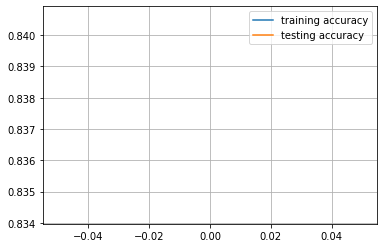

100%|██████████| 1406/1406 [00:07<00:00, 188.26it/s]


Training accuracy: 0.8916666666666667
Testing accuracy: 0.8933


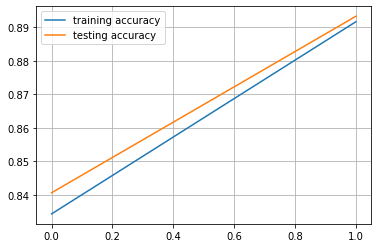

100%|██████████| 1406/1406 [00:07<00:00, 187.08it/s]


Training accuracy: 0.9047777777777778
Testing accuracy: 0.9085


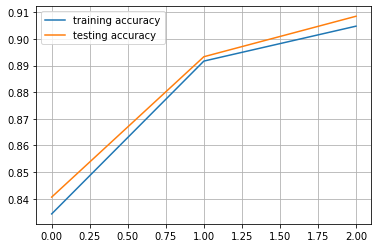

100%|██████████| 1406/1406 [00:07<00:00, 188.94it/s]


Training accuracy: 0.9122666666666667
Testing accuracy: 0.9153


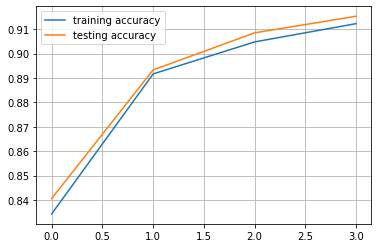

100%|██████████| 1406/1406 [00:07<00:00, 188.76it/s]


Training accuracy: 0.9210444444444444
Testing accuracy: 0.9207


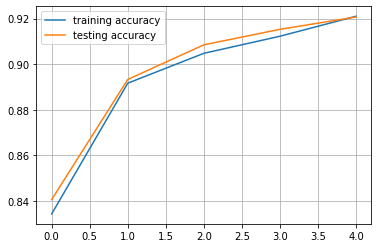

100%|██████████| 1406/1406 [00:07<00:00, 188.62it/s]


Training accuracy: 0.9255777777777778
Testing accuracy: 0.9246


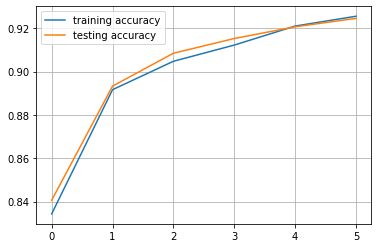

100%|██████████| 1406/1406 [00:07<00:00, 187.44it/s]


Training accuracy: 0.9324
Testing accuracy: 0.931


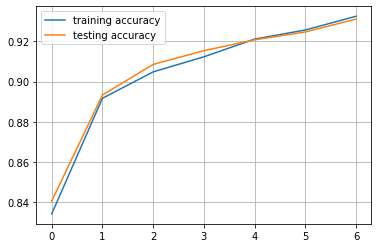

100%|██████████| 1406/1406 [00:07<00:00, 188.19it/s]


Training accuracy: 0.9363111111111111
Testing accuracy: 0.9337


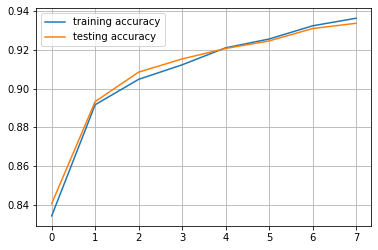

100%|██████████| 1406/1406 [00:07<00:00, 187.81it/s]


Training accuracy: 0.9398222222222222
Testing accuracy: 0.9361


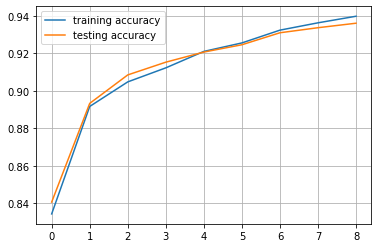

100%|██████████| 1406/1406 [00:07<00:00, 182.97it/s]


Training accuracy: 0.94
Testing accuracy: 0.937


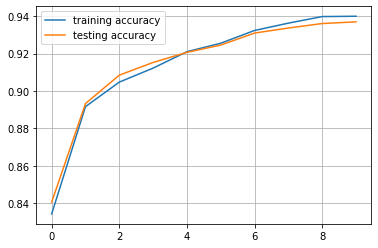

100%|██████████| 1406/1406 [00:07<00:00, 189.20it/s]


Training accuracy: 0.9441555555555555
Testing accuracy: 0.9391


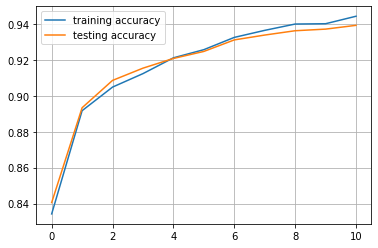

100%|██████████| 1406/1406 [00:07<00:00, 187.30it/s]


Training accuracy: 0.9480888888888889
Testing accuracy: 0.9431


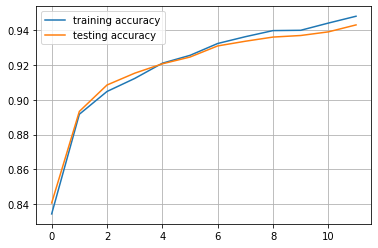

100%|██████████| 1406/1406 [00:07<00:00, 187.00it/s]


Training accuracy: 0.9476444444444444
Testing accuracy: 0.9427


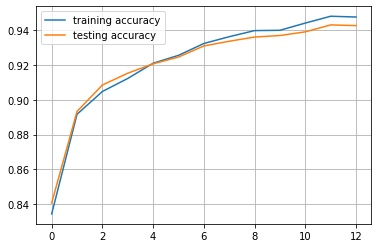

100%|██████████| 1406/1406 [00:07<00:00, 188.91it/s]


Training accuracy: 0.9519333333333333
Testing accuracy: 0.9464


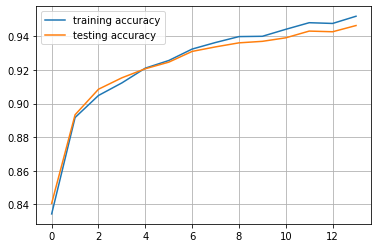

100%|██████████| 1406/1406 [00:07<00:00, 187.32it/s]


Training accuracy: 0.9534222222222222
Testing accuracy: 0.948


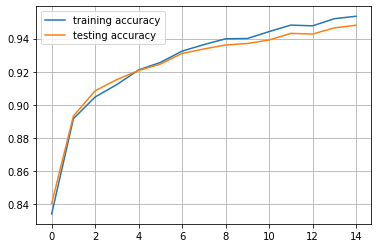

100%|██████████| 1406/1406 [00:07<00:00, 189.27it/s]


Training accuracy: 0.9562888888888889
Testing accuracy: 0.9493


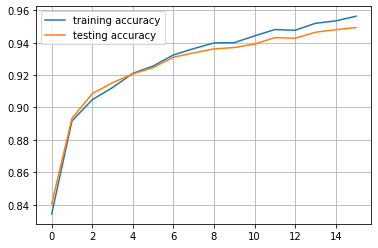

100%|██████████| 1406/1406 [00:07<00:00, 185.69it/s]


Training accuracy: 0.9576222222222223
Testing accuracy: 0.9502


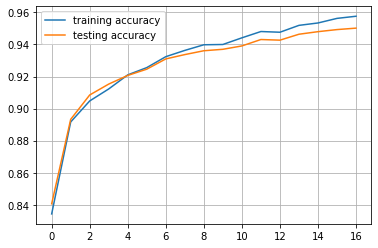

100%|██████████| 1406/1406 [00:07<00:00, 187.40it/s]


Training accuracy: 0.9608444444444444
Testing accuracy: 0.9523


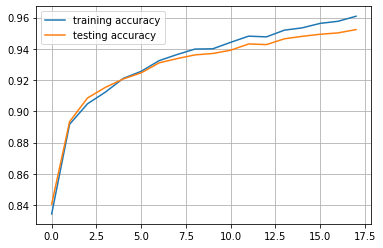

100%|██████████| 1406/1406 [00:07<00:00, 189.51it/s]


Training accuracy: 0.9613111111111111
Testing accuracy: 0.9525


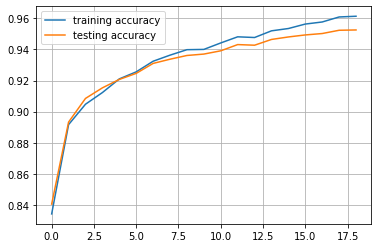

100%|██████████| 1406/1406 [00:07<00:00, 189.19it/s]


Training accuracy: 0.9612888888888889
Testing accuracy: 0.9517


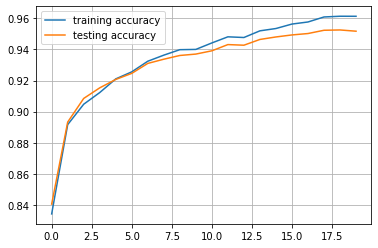

100%|██████████| 1406/1406 [00:07<00:00, 187.33it/s]


Training accuracy: 0.9648222222222222
Testing accuracy: 0.9538


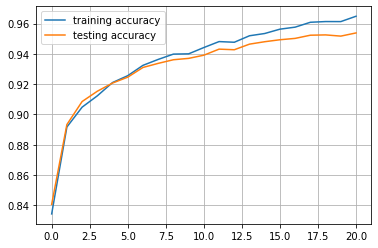

100%|██████████| 1406/1406 [00:07<00:00, 187.51it/s]


Training accuracy: 0.9666222222222223
Testing accuracy: 0.9563


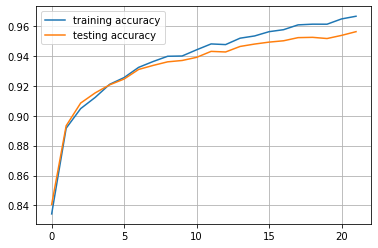

100%|██████████| 1406/1406 [00:07<00:00, 187.56it/s]


Training accuracy: 0.9667777777777777
Testing accuracy: 0.9554


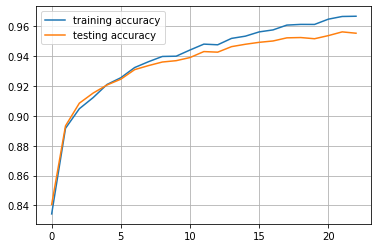

100%|██████████| 1406/1406 [00:07<00:00, 182.28it/s]


Training accuracy: 0.9675555555555555
Testing accuracy: 0.9545


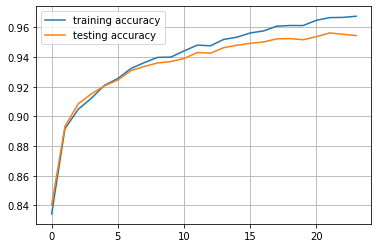

100%|██████████| 1406/1406 [00:07<00:00, 188.03it/s]


Training accuracy: 0.9706444444444444
Testing accuracy: 0.9583


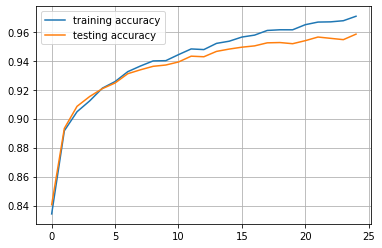

100%|██████████| 1406/1406 [00:07<00:00, 188.05it/s]


Training accuracy: 0.9707777777777777
Testing accuracy: 0.9608


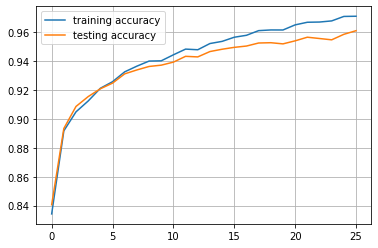

100%|██████████| 1406/1406 [00:07<00:00, 191.11it/s]


Training accuracy: 0.9722
Testing accuracy: 0.961


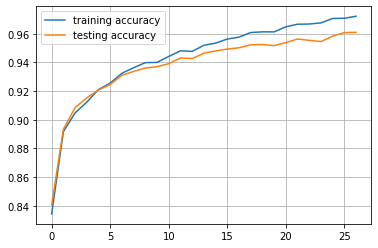

100%|██████████| 1406/1406 [00:07<00:00, 187.07it/s]


Training accuracy: 0.9732888888888889
Testing accuracy: 0.961


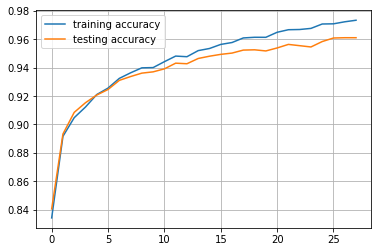

100%|██████████| 1406/1406 [00:07<00:00, 188.85it/s]


Training accuracy: 0.9734222222222222
Testing accuracy: 0.9613


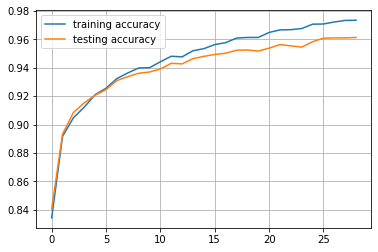

100%|██████████| 1406/1406 [00:07<00:00, 190.12it/s]


Training accuracy: 0.9744444444444444
Testing accuracy: 0.9624


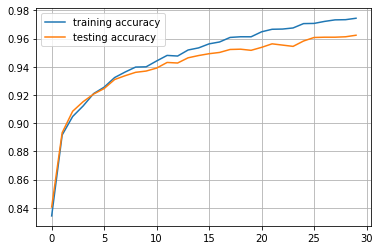

100%|██████████| 1406/1406 [00:07<00:00, 184.52it/s]


Training accuracy: 0.9759333333333333
Testing accuracy: 0.9618


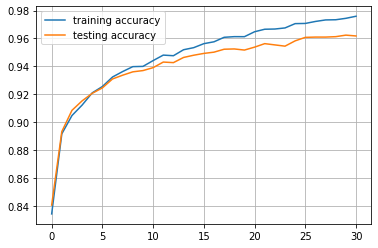

100%|██████████| 1406/1406 [00:07<00:00, 185.57it/s]


Training accuracy: 0.9758666666666667
Testing accuracy: 0.9633


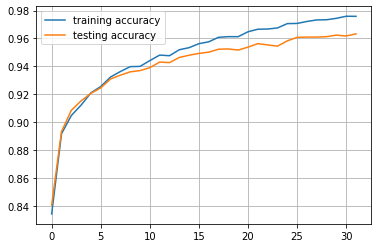

100%|██████████| 1406/1406 [00:07<00:00, 188.57it/s]


Training accuracy: 0.9784222222222222
Testing accuracy: 0.9638


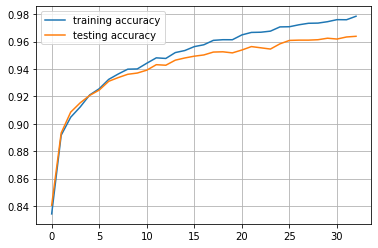

100%|██████████| 1406/1406 [00:07<00:00, 188.74it/s]


Training accuracy: 0.9779777777777777
Testing accuracy: 0.9646


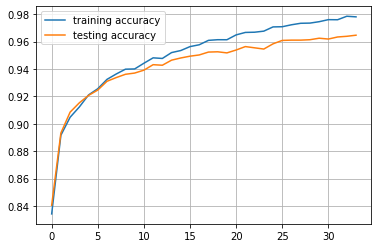

100%|██████████| 1406/1406 [00:07<00:00, 190.52it/s]


Training accuracy: 0.9795777777777778
Testing accuracy: 0.9652


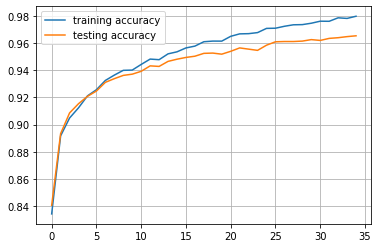

100%|██████████| 1406/1406 [00:07<00:00, 188.61it/s]


Training accuracy: 0.98
Testing accuracy: 0.9659


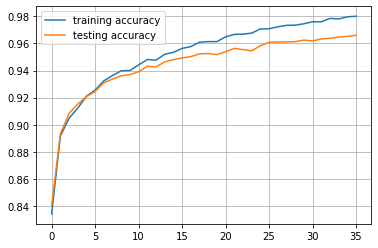

100%|██████████| 1406/1406 [00:07<00:00, 188.06it/s]


Training accuracy: 0.9803111111111111
Testing accuracy: 0.9656


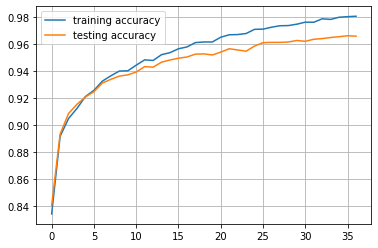

100%|██████████| 1406/1406 [00:07<00:00, 188.00it/s]


Training accuracy: 0.9817777777777777
Testing accuracy: 0.9669


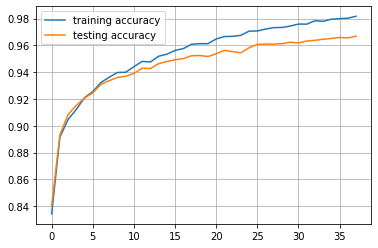

100%|██████████| 1406/1406 [00:07<00:00, 184.61it/s]


Training accuracy: 0.9816
Testing accuracy: 0.966


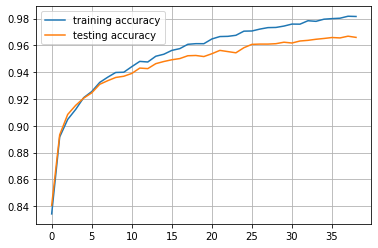

100%|██████████| 1406/1406 [00:07<00:00, 189.06it/s]


Training accuracy: 0.9824
Testing accuracy: 0.9665


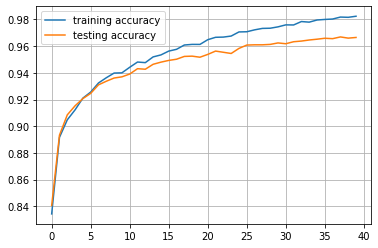

100%|██████████| 1406/1406 [00:07<00:00, 187.83it/s]


Training accuracy: 0.9833777777777778
Testing accuracy: 0.9676


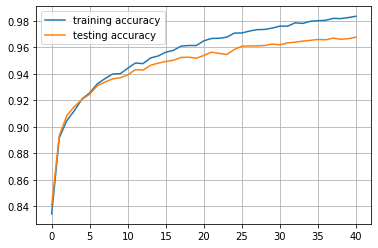

100%|██████████| 1406/1406 [00:07<00:00, 186.24it/s]


Training accuracy: 0.9833333333333333
Testing accuracy: 0.967


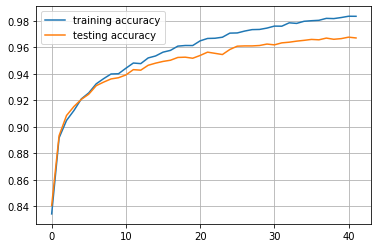

100%|██████████| 1406/1406 [00:07<00:00, 188.26it/s]


Training accuracy: 0.9851333333333333
Testing accuracy: 0.968


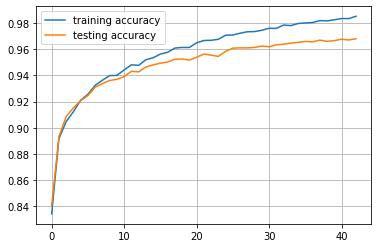

100%|██████████| 1406/1406 [00:07<00:00, 188.39it/s]


Training accuracy: 0.9851555555555556
Testing accuracy: 0.9674


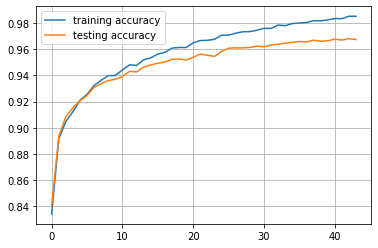

100%|██████████| 1406/1406 [00:07<00:00, 187.22it/s]


Training accuracy: 0.9849111111111111
Testing accuracy: 0.9676


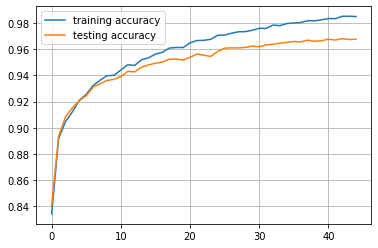

100%|██████████| 1406/1406 [00:07<00:00, 183.64it/s]


Training accuracy: 0.9852444444444445
Testing accuracy: 0.9679


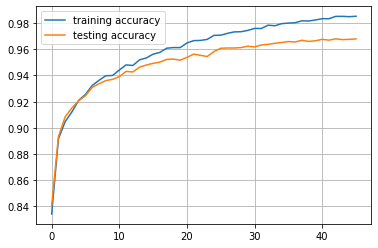

100%|██████████| 1406/1406 [00:07<00:00, 186.70it/s]


Training accuracy: 0.9860444444444444
Testing accuracy: 0.9688


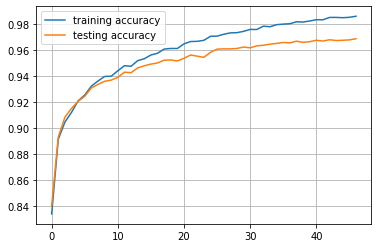

100%|██████████| 1406/1406 [00:07<00:00, 189.78it/s]


Training accuracy: 0.9874222222222222
Testing accuracy: 0.969


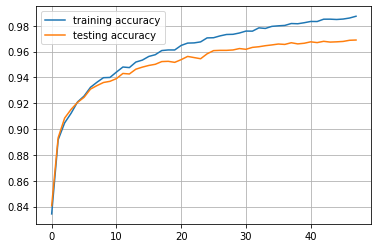

100%|██████████| 1406/1406 [00:07<00:00, 189.02it/s]


Training accuracy: 0.9867333333333334
Testing accuracy: 0.9684


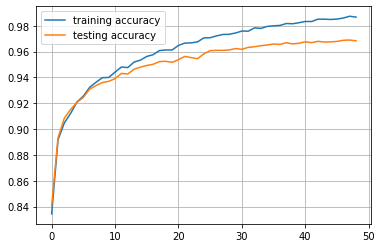

100%|██████████| 1406/1406 [00:07<00:00, 188.82it/s]


Training accuracy: 0.9875111111111111
Testing accuracy: 0.9682


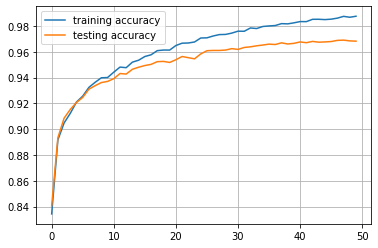

In [26]:
training_log = []
testing_log = []

#Setting number of iterations as 50 after experimenting and early stopping
for iteration in range(50):
    
    for x_group,y_group in make_groups(X_train,y_train,groupsize=32):
        learn_neural_network(neural_network,x_group,y_group)
    
    training_log.append(np.mean(predictions(neural_network,X_train)==y_train))
    testing_log.append(np.mean(predictions(neural_network,X_test)==y_test))
    
    
  
    print("Training accuracy:",training_log[-1])
    print("Testing accuracy:",testing_log[-1])
    plt.plot(training_log,label='training accuracy')
    plt.plot(testing_log,label='testing accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()


##Simple Confusion Matrix

In [0]:

y_predicted_labels = predictions(neural_network,X_test)

from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test,y_predicted_labels,labels=range(10))


array([[ 964,    0,    2,    1,    1,    3,    7,    1,    1,    0],
       [   0, 1126,    3,    0,    0,    1,    3,    0,    2,    0],
       [   3,    5,  998,    4,    4,    0,    3,    8,    7,    0],
       [   0,    0,    7,  983,    0,    4,    0,    5,    7,    4],
       [   2,    0,    5,    1,  950,    0,    1,    3,    1,   19],
       [   4,    3,    0,   24,    2,  844,    6,    0,    8,    1],
       [   6,    4,    0,    1,    6,    8,  926,    1,    5,    1],
       [   0,   10,   14,    6,    4,    2,    0,  983,    2,    7],
       [   3,    1,    6,   11,    3,    3,    4,    4,  938,    1],
       [   2,    6,    1,    5,   14,    2,    2,    7,    0,  970]])

##Overall Accuracy

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted_labels)

0.9682

##Misses by the model

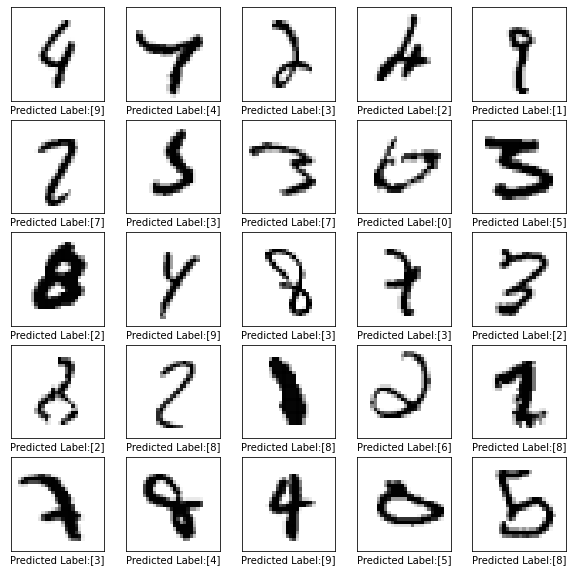

In [30]:
errors_indices = []
for i in range(0, len(y_predicted_labels)):
  #print("y_pred = " + str(y_pred[i]))
  #print("test_lable = " + str(test_labels[i]))
  if(y_predicted_labels[i] != y_test[i]):
    errors_indices.append(i)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[errors_indices[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Predicted Label:" + str([y_predicted_labels[errors_indices[i]]]))
plt.show()



##Implementing the Data Augmentation to improve accuracy

In [0]:
 def data_augmentation(x_train,y_train,augment_size=5000): 
        image_generator = ImageDataGenerator(
            rotation_range=10,
            zoom_range = 0.05, 
            width_shift_range=0.05,
            height_shift_range=0.05,
            horizontal_flip=False,
            vertical_flip=False, 
            data_format="channels_last",
            zca_whitening=True)
        image_generator.fit(x_train, augment=True)       
        train_size=len(x_train)
        randidx = np.random.randint(train_size, size=augment_size)
        x_augmented = x_train[randidx].copy()
        y_augmented = y_train[randidx].copy()
        x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                    batch_size=augment_size, shuffle=False).next()[0]        
        x_train = np.concatenate((x_train, x_augmented))
        y_train = np.concatenate((y_train, y_augmented))
        train_size = x_train.shape[0]
        return x_train, y_train


In [32]:
X_train = X_train.reshape((X_train.shape[0], 28, 28,1))

X_train,y_train=data_augmentation(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


##Previewing augmented data


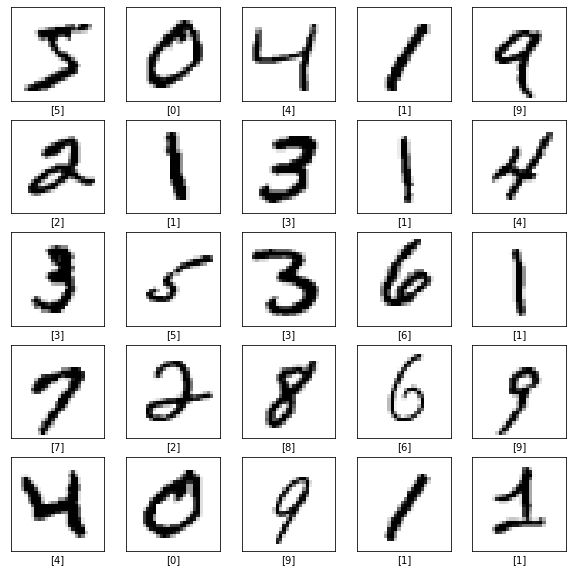

In [33]:


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

##Initializing network with augmented data and checking accuracy

100%|██████████| 1562/1562 [00:08<00:00, 183.82it/s]


Training accuracy: 0.9905
Testing accuracy: 0.972


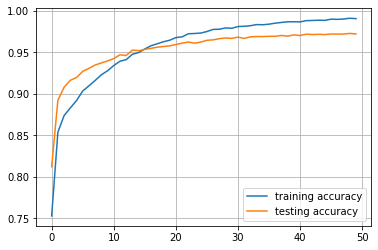

In [34]:
X_train = X_train.reshape([X_train.shape[0], -1])
X_test = X_test.reshape([X_test.shape[0], -1])

neural_network = []
neural_network.append(NodeLayer(X_train.shape[1],512))
neural_network.append(ActivationLayer())
neural_network.append(NodeLayer(512,256))
neural_network.append(ActivationLayer())
neural_network.append(NodeLayer(256,10))

training_log = []
testing_log = []
for iteration in range(50):
    clear_output(wait=True)
    for x_group,y_group in make_groups(X_train,y_train,groupsize=32):
        learn_neural_network(neural_network,x_group,y_group)
    
    training_log.append(np.mean(predictions(neural_network,X_train)==y_train))
    testing_log.append(np.mean(predictions(neural_network,X_test)==y_test))
    
    
  
    print("Training accuracy:",training_log[-1])
    print("Testing accuracy:",testing_log[-1])
    plt.plot(training_log,label='training accuracy')
    plt.plot(testing_log,label='testing accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()



##Clearly the accuracy improved after augmenting the data.